In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
# Load data
data = pd.read_csv("task2breddit.csv")

In [4]:
data = data.dropna()

In [5]:
# Preprocess text
data["Generation"] = data["Generation"].str.lower()
data["Generation"] = data["Generation"].str.replace("[^\w\s]", "")
data["Generation"] = data["Generation"].str.replace("\d+", "")
data["Generation"] = data["Generation"].str.strip()
data["Generation"] = data["Generation"].str.split()

<ipython-input-5-b715872c4ca9>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Generation"] = data["Generation"].str.replace("[^\w\s]", "")
<ipython-input-5-b715872c4ca9>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Generation"] = data["Generation"].str.replace("\d+", "")


In [6]:
# Remove stop words
stop_words = set(stopwords.words('english'))
data["Generation"] = data["Generation"].apply(lambda x: [word for word in x if word not in stop_words])

In [7]:
# Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data["Generation"])
sequences = tokenizer.texts_to_sequences(data["Generation"])

In [8]:
# Pad sequences
maxlen = 100
padded_sequences = pad_sequences(sequences, maxlen=maxlen)

In [9]:
# Encode labels
labels = pd.get_dummies(data["label"]).values

In [10]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [11]:
y_test = np.argmax(y_test, axis=1)

In [12]:
# Define model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(2, activation="softmax"))

In [13]:
# Compile model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [14]:
# Train model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
16/16 [==============================] - 15s 311ms/step - loss: 0.5808 - accuracy: 0.6949 - val_loss: 0.4472 - val_accuracy: 0.7953
Epoch 2/10
16/16 [==============================] - 3s 185ms/step - loss: 0.2718 - accuracy: 0.8996 - val_loss: 0.2259 - val_accuracy: 0.9134
Epoch 3/10
16/16 [==============================] - 3s 191ms/step - loss: 0.1070 - accuracy: 0.9764 - val_loss: 0.1557 - val_accuracy: 0.9528
Epoch 4/10
16/16 [==============================] - 3s 172ms/step - loss: 0.0336 - accuracy: 0.9980 - val_loss: 0.1441 - val_accuracy: 0.9370
Epoch 5/10
16/16 [==============================] - 3s 214ms/step - loss: 0.0177 - accuracy: 0.9980 - val_loss: 0.1586 - val_accuracy: 0.9685
Epoch 6/10
16/16 [==============================] - 2s 119ms/step - loss: 0.0148 - accuracy: 0.9980 - val_loss: 0.1228 - val_accuracy: 0.9764
Epoch 7/10
16/16 [==============================] - 3s 163ms/step - loss: 0.0131 - accuracy: 0.9980 - val_loss: 0.1216 - val_accuracy: 0.9764
Epoch

In [15]:
y_pred02 = model.predict(X_test)
y_pred02 = np.argmax(y_pred02, axis=1)

5/5 [==============================] - 1s 10ms/step


In [16]:
print(classification_report( y_test, y_pred02))
print(confusion_matrix(y_test, y_pred02,))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        82
           1       0.94      0.96      0.95        77

    accuracy                           0.95       159
   macro avg       0.95      0.95      0.95       159
weighted avg       0.95      0.95      0.95       159

[[77  5]
 [ 3 74]]


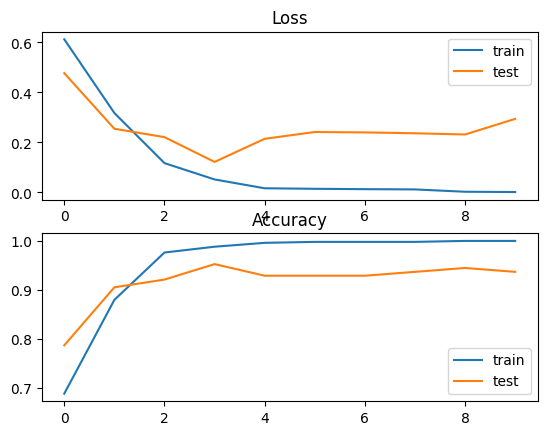

In [ ]:
from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()